In [1]:
print("Hello World!")

Hello World!


In [2]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# WINE COLOR PREDICTION 

## Loading Dataset

### Loading Red wine

In [3]:
# loading red wine data set
red_wine= pd.read_csv("winequality-red.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_3588\1102840455.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  red_wine= pd.read_csv("winequality-red.csv", sep=None)


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:

#Renaming the columns
red_wine.rename(columns={"fixed acidity":"Fixed acidity g/dm³","volatile acidity":"Volatile acidity g/dm³", "citric acid":"Citric acid g/dm³", "residual sugar":"Residual sugar g/dm³","chlorides":"Chlorides g/dm³", "free sulfur dioxide":"Free sulfur dioxide mg/dm³", "total sulfur dioxide":"Total sulfur dioxide g/dm³", "density":"Density g/cm³", "sulphates":"Sulphates g/dm³", "alcohol":"Alcohol %"} , inplace= True)

In [9]:
red_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
# Getting  summary of the data set
red_wine.describe().T


,count,mean,std,min,25%,50%,75%,max
Fixed acidity g/dm³,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Volatile acidity g/dm³,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Citric acid g/dm³,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Residual sugar g/dm³,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Chlorides g/dm³,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Free sulfur dioxide mg/dm³,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Total sulfur dioxide g/dm³,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Density g/cm³,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Sulphates g/dm³,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
#  The dataset contains physicochemical and sensory variables which require a bit more understanding.

#Fixed acidity: acids are major wine properties and contribute greatly to the wine’s taste. Usually, the total acidity is divided into two groups: the volatile acids and the nonvolatile or fixed acids. Among the fixed acids that you can find in wines are the following: tartaric, malic, citric, and succinic. This variable is expressed in g(tartaricacid)/dm3 in the data sets.

#Volatile acidity: the volatile acidity is basically the process of wine turning into vinegar. In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. In these data sets, the volatile acidity is expressed in g(aceticacid)/dm3.

#Citric acid is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3 in the two data sets. Residual sugar typically refers to the sugar remaining after fermentation stops, or is stopped. It’s expressed in g/dm3 in the red and white data.

#Chlorides can be a significant contributor to saltiness in wine. Here, you’ll see that it’s expressed in g(sodiumchloride)/dm3.

#Free sulfur dioxide: the part of the sulfur dioxide that is added to a wine and that is lost into it is said to be bound, while the active part is said to be free. The winemaker will always try to get the highest proportion of free sulfur to bind. This variable is expressed in mg/dm3 in the data.

#Total sulfur dioxide is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3. There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L, and for Australia, this is 250mg/L.

#Density is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g/cm3.

#pH or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

#Sulfates are to wine as gluten is to food. You might already know sulfites from the headaches that they can cause. They are a regular part of wine making around the world and are considered necessary. In this case, they are expressed in g(potassiumsulphate)/dm3.

#Alcohol: wine is an alcoholic beverage, and as you know, the percentage of alcohol can vary from wine to wine. It shouldn’t be surprised that this variable is included in the data sets, where it’s expressed in % vol.

#Quality: wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual number is the mean of at least three evaluations made by those same wine experts. Some analysts might combine these levels to Low, Medium & High-Quality wines. #

In [12]:
# Creating a new feature "Wine_type": This will represent the color of the wine
red_wine["wine_type"]="red"

In [13]:
red_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [14]:
##Finding Data types of columns
red_wine.dtypes

Fixed acidity g/dm³           float64
Volatile acidity g/dm³        float64
Citric acid g/dm³             float64
Residual sugar g/dm³          float64
Chlorides g/dm³               float64
Free sulfur dioxide mg/dm³    float64
Total sulfur dioxide g/dm³    float64
Density g/cm³                 float64
pH                            float64
Sulphates g/dm³               float64
Alcohol %                     float64
quality                         int64
wine_type                      object
dtype: object

### Loading White wine

In [15]:
# loading red wine data set
white_wine= pd.read_csv("winequality-white.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_3588\1024355258.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  white_wine= pd.read_csv("winequality-white.csv", sep=None)


In [16]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [18]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
#Checking if there for non value data
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
##Renaming the columns
white_wine.rename(columns={"fixed acidity":"Fixed acidity g/dm³","volatile acidity":"Volatile acidity g/dm³", "citric acid":"Citric acid g/dm³", "residual sugar":"Residual sugar g/dm³","chlorides":"Chlorides g/dm³", "free sulfur dioxide":"Free sulfur dioxide mg/dm³", "total sulfur dioxide":"Total sulfur dioxide g/dm³", "density":"Density g/cm³", "sulphates":"Sulphates g/dm³", "alcohol":"Alcohol %"} , inplace=True)

In [21]:
white_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
# Getting  summary of the data set
white_wine.describe().T


,count,mean,std,min,25%,50%,75%,max
Fixed acidity g/dm³,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
Volatile acidity g/dm³,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
Citric acid g/dm³,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
Residual sugar g/dm³,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
Chlorides g/dm³,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
Free sulfur dioxide mg/dm³,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
Total sulfur dioxide g/dm³,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
Density g/cm³,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
Sulphates g/dm³,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [23]:
# Creating a new feature "Wine_type": This will represent the color of the wine
white_wine["wine_type"]="white"

In [24]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fixed acidity g/dm³         4898 non-null   float64
 1   Volatile acidity g/dm³      4898 non-null   float64
 2   Citric acid g/dm³           4898 non-null   float64
 3   Residual sugar g/dm³        4898 non-null   float64
 4   Chlorides g/dm³             4898 non-null   float64
 5   Free sulfur dioxide mg/dm³  4898 non-null   float64
 6   Total sulfur dioxide g/dm³  4898 non-null   float64
 7   Density g/cm³               4898 non-null   float64
 8   pH                          4898 non-null   float64
 9   Sulphates g/dm³             4898 non-null   float64
 10  Alcohol %                   4898 non-null   float64
 11  quality                     4898 non-null   int64  
 12  wine_type                   4898 non-null   object 
dtypes: float64(11), int64(1), object(

## Dropping Duplicates in Data set

In [25]:
red_wine.drop_duplicates().reset_index(drop=True)


,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [26]:
white_wine.drop_duplicates().reset_index(drop=True)

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<function matplotlib.pyplot.show(close=None, block=None)>

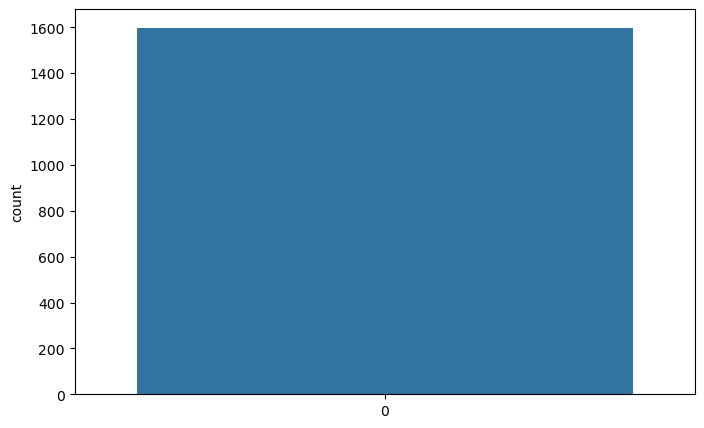

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(red_wine["Alcohol %"])
plt.title("")
plt.show

In [28]:
## Concatenating Data set

combined_wine1=pd.concat([red_wine,white_wine])

In [29]:
combined_wine= combined_wine1.drop_duplicates().reset_index(drop=True)

In [30]:
combined_wine.shape

(5320, 13)

In [31]:
combined_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fixed acidity g/dm³         5320 non-null   float64
 1   Volatile acidity g/dm³      5320 non-null   float64
 2   Citric acid g/dm³           5320 non-null   float64
 3   Residual sugar g/dm³        5320 non-null   float64
 4   Chlorides g/dm³             5320 non-null   float64
 5   Free sulfur dioxide mg/dm³  5320 non-null   float64
 6   Total sulfur dioxide g/dm³  5320 non-null   float64
 7   Density g/cm³               5320 non-null   float64
 8   pH                          5320 non-null   float64
 9   Sulphates g/dm³             5320 non-null   float64
 10  Alcohol %                   5320 non-null   float64
 11  quality                     5320 non-null   int64  
 12  wine_type                   5320 non-null   object 
dtypes: float64(11), int64(1), object(

In [32]:
combined_wine_cpd=combined_wine.copy()

In [33]:
combined_wine_cpd

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Univeriate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

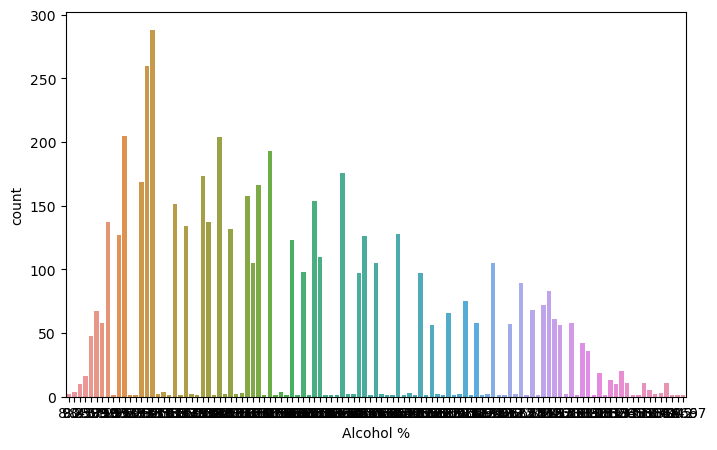

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=combined_wine_cpd, x="Alcohol %")
plt.title("")
plt.show

## Dropping irelevance feature

In [35]:
combined_wine_cpd.drop("quality", axis=1, inplace= True)

In [36]:
combined_wine_cpd

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white


# Encoding

In [37]:
combined_wine_cpd["wine_type"].replace({"red":1, "white":0}, inplace=True)

# Data seperation as x and y

In [38]:
y=combined_wine_cpd["wine_type"]

In [39]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5315    0
5316    0
5317    0
5318    0
5319    0
Name: wine_type, Length: 5320, dtype: int64

In [40]:
X=combined_wine_cpd.drop("wine_type", axis=1)

In [41]:
X

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fixed acidity g/dm³         5320 non-null   float64
 1   Volatile acidity g/dm³      5320 non-null   float64
 2   Citric acid g/dm³           5320 non-null   float64
 3   Residual sugar g/dm³        5320 non-null   float64
 4   Chlorides g/dm³             5320 non-null   float64
 5   Free sulfur dioxide mg/dm³  5320 non-null   float64
 6   Total sulfur dioxide g/dm³  5320 non-null   float64
 7   Density g/cm³               5320 non-null   float64
 8   pH                          5320 non-null   float64
 9   Sulphates g/dm³             5320 non-null   float64
 10  Alcohol %                   5320 non-null   float64
dtypes: float64(11)
memory usage: 457.3 KB


## Data splitting

In [43]:

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [44]:
X_train.shape

(4256, 11)

In [45]:
X_test.shape

(1064, 11)

In [46]:
y_train.shape

(4256,)

In [47]:
y_test.shape

(1064,)

# Model Building

### Logistic Regression

Training  the model

Applying the model to make predicting

#### Evaluate model performance

### Random Forest

Training  the model

Applying the model to make predicting

#### Evaluate model performance

# WINE QUALITY PREDICTION

In [48]:
red_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [49]:
combined_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [50]:
combined_wine.shape

(5320, 13)

In [51]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



Visualizing Outliers

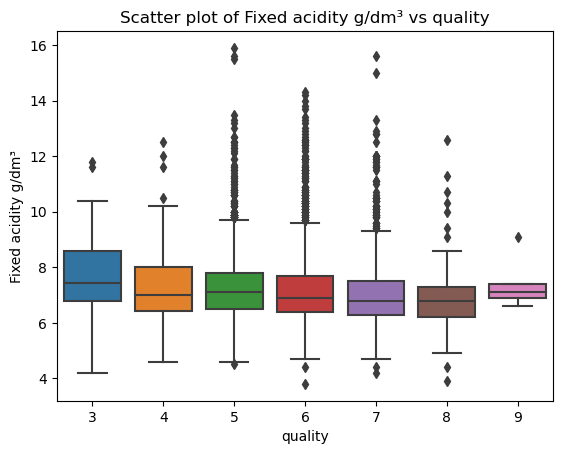

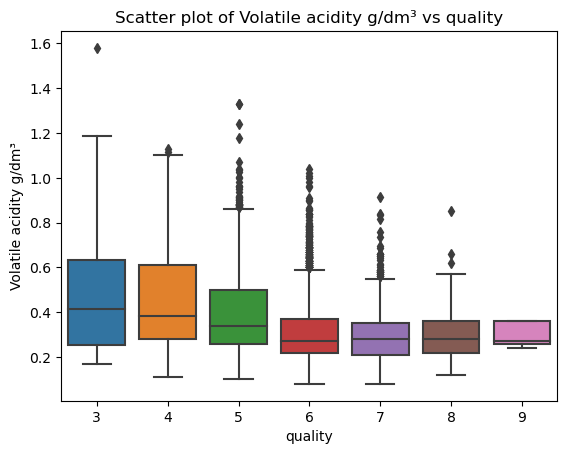

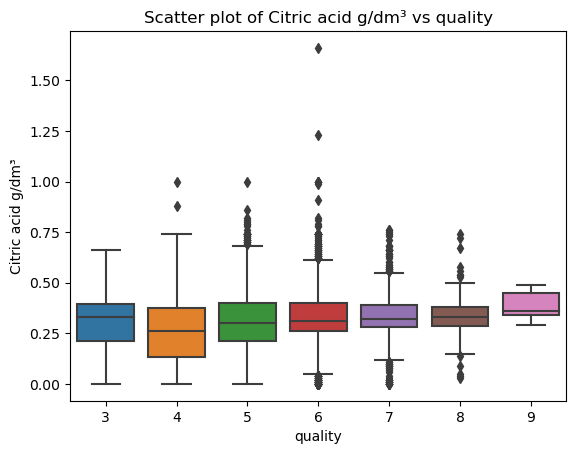

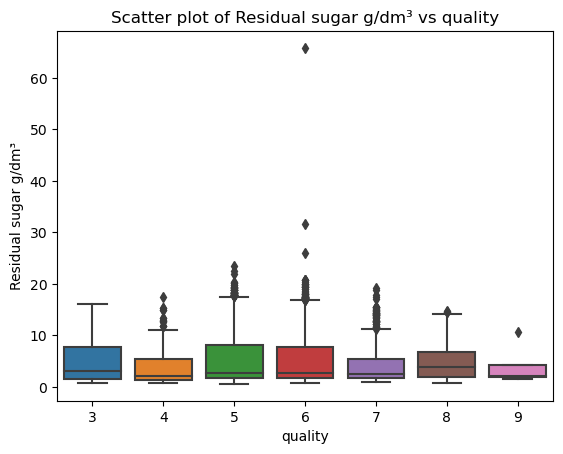

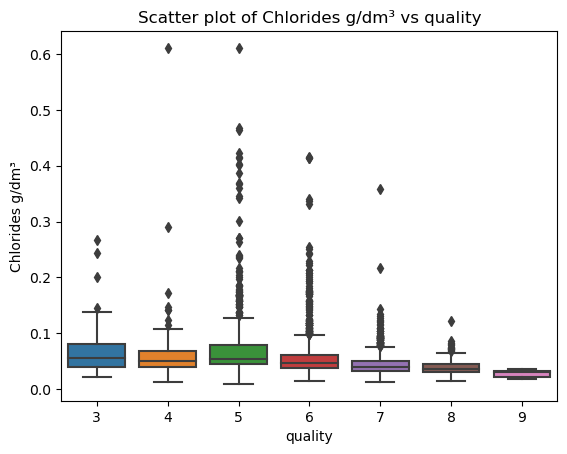

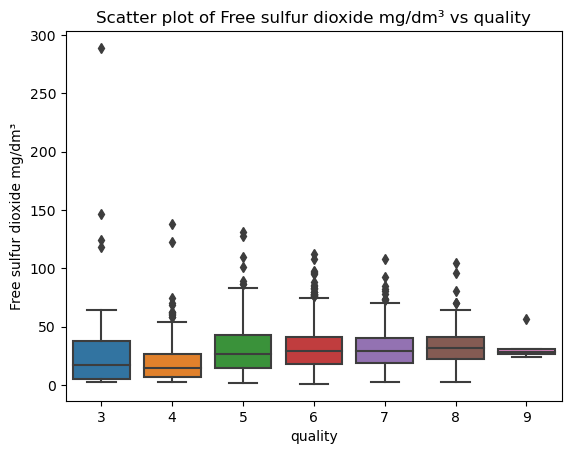

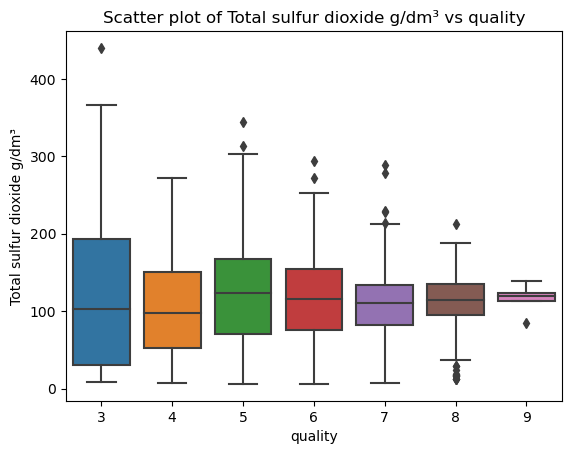

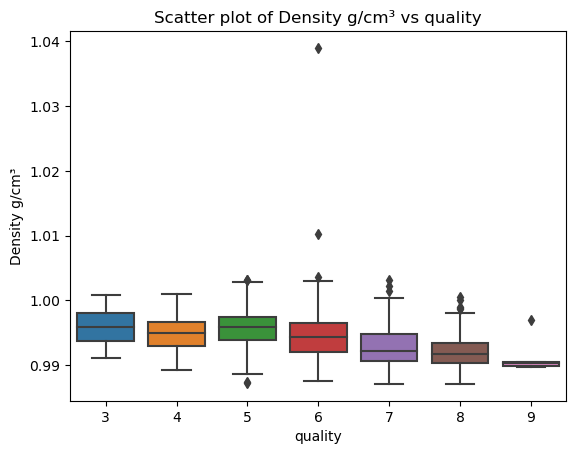

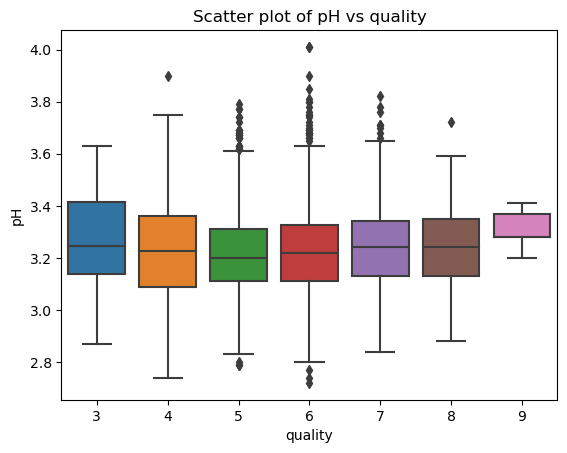

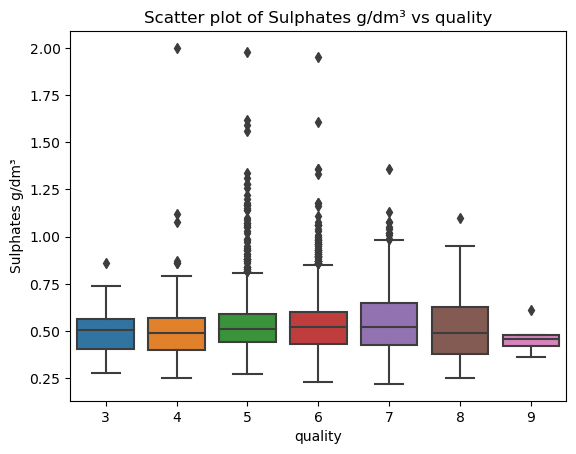

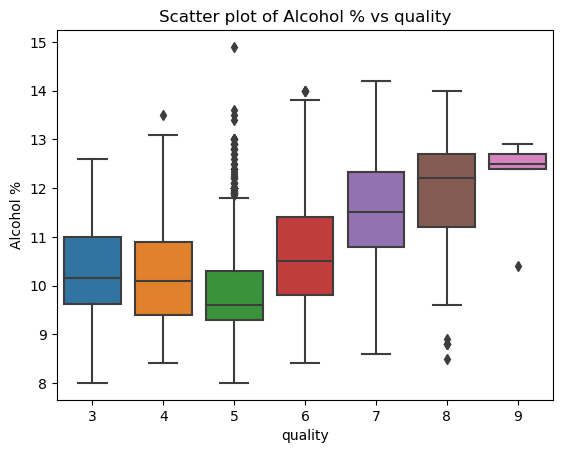

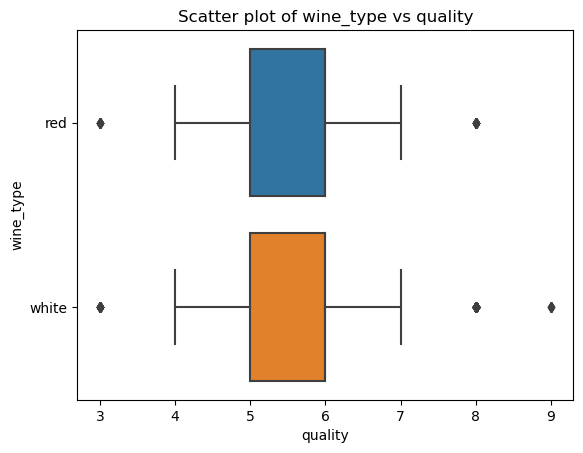

In [52]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable
target = 'quality'

# Loop through each feature
for feature in combined_wine.columns:
    if feature != target:  # Exclude the target variable
        sns.boxplot(x=target, y=feature, data=combined_wine)
        plt.title(f'Scatter plot of {feature} vs {target}')
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()

In [53]:
combined_wine

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


ENCODING

In [54]:
combined_wine_cpd_2=combined_wine.copy()

In [55]:
combined_wine_cpd_2["quality_label"]=combined_wine_cpd_2["quality"].apply(lambda value: "low"
                                                       if value <=5 else "medium"
                                                       if value <=7 else "high")

#Transforming these labels into categrical data type instead of simple string

#combined_wine_cpd_2["quality_label"]=pd.Categorical(combined_wine_cpd_2["quality_label"],
#categories= ["low","medium","high"])

In [56]:
combined_wine_cpd_2.head()

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [57]:
combined_wine_cpd_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fixed acidity g/dm³         5320 non-null   float64
 1   Volatile acidity g/dm³      5320 non-null   float64
 2   Citric acid g/dm³           5320 non-null   float64
 3   Residual sugar g/dm³        5320 non-null   float64
 4   Chlorides g/dm³             5320 non-null   float64
 5   Free sulfur dioxide mg/dm³  5320 non-null   float64
 6   Total sulfur dioxide g/dm³  5320 non-null   float64
 7   Density g/cm³               5320 non-null   float64
 8   pH                          5320 non-null   float64
 9   Sulphates g/dm³             5320 non-null   float64
 10  Alcohol %                   5320 non-null   float64
 11  quality                     5320 non-null   int64  
 12  wine_type                   5320 non-null   object 
 13  quality_label               5320 

In [58]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#label_quality=LabelEncoder()

#combined_wine_cpd_2["quality_label"]=label_quality.fit_transform(combined_wine_cpd_2["quality_label"])

ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']], dtype=int)
combined_wine_cpd_2['quality_label_encoded'] = ordinal_encoder.fit_transform(combined_wine_cpd_2[['quality_label']])



In [59]:
combined_wine_cpd_2["wine_type"].replace({"red":0, "white":1}, inplace=True)

In [60]:
combined_wine_cpd_2.head()

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality,wine_type,quality_label,quality_label_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,medium,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,low,0


## Dropping quality and wine_type

In [61]:
irre_col=combined_wine_cpd_2[["quality", "wine_type", "quality_label"]]
combined_wine_cpd_2.drop( columns=irre_col, axis=1, inplace= True)

In [62]:
combined_wine_cpd_2.head()

,Fixed acidity g/dm³,Volatile acidity g/dm³,Citric acid g/dm³,Residual sugar g/dm³,Chlorides g/dm³,Free sulfur dioxide mg/dm³,Total sulfur dioxide g/dm³,Density g/cm³,pH,Sulphates g/dm³,Alcohol %,quality_label_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


# Data seperation as x and y

In [63]:
y=combined_wine_cpd_2["quality_label_encoded"]



In [64]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5320 entries, 0 to 5319
Series name: quality_label_encoded
Non-Null Count  Dtype
--------------  -----
5320 non-null   int32
dtypes: int32(1)
memory usage: 20.9 KB


In [65]:
X=combined_wine_cpd_2.drop("quality_label_encoded",axis=1)

In [66]:
X.shape

(5320, 11)

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fixed acidity g/dm³         5320 non-null   float64
 1   Volatile acidity g/dm³      5320 non-null   float64
 2   Citric acid g/dm³           5320 non-null   float64
 3   Residual sugar g/dm³        5320 non-null   float64
 4   Chlorides g/dm³             5320 non-null   float64
 5   Free sulfur dioxide mg/dm³  5320 non-null   float64
 6   Total sulfur dioxide g/dm³  5320 non-null   float64
 7   Density g/cm³               5320 non-null   float64
 8   pH                          5320 non-null   float64
 9   Sulphates g/dm³             5320 non-null   float64
 10  Alcohol %                   5320 non-null   float64
dtypes: float64(11)
memory usage: 457.3 KB


## Data splitting

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train.shape

(4256, 11)

In [70]:
X_test.shape

(1064, 11)

In [71]:
y_train.shape

(4256,)

In [72]:
y_test.shape

(1064,)

# Building a Function of differnt Models 

In [73]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
def models(X_train, y_train):
  
    # Using Logistic Regression Algorithm
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    # Using K Nearest Neighbors Algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
    knn.fit(X_train, y_train)

    # Using Support Vector Machine with Linear Kernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel="linear", random_state=0)
    svc_lin.fit(X_train, y_train)

    # Using Support Vector Machine with RBF Kernel
    svc_rbf = SVC(kernel="rbf", random_state=0)
    svc_rbf.fit(X_train, y_train)

    # Using Gaussian Naive Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

    # Using Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(X_train, y_train)

    # Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
    forest.fit(X_train, y_train)

    # Print model accuracy on the training data.
    print("[0]Logistic Regression Training Accuracy:", log.score(X_train, y_train))
    print("[1]K Nearest Neighbour Training Accuracy:", knn.score(X_train, y_train))
    print("[2]Support Vector Machine(Linear Classifier) Training Accuracy:", svc_lin.score(X_train, y_train))
    print("[3]Support Vector Machine(RBF Classifier) Training Accuracy:", svc_rbf.score(X_train, y_train))
    print("[4]Gaussian Naive Bayes Training Accuracy:", gauss.score(X_train, y_train))
    print("[5]Decision Tree Classifer Training Accuracy:", tree.score(X_train, y_train))
    print("[6]Random Forest Classifier Training Accuracy:", forest.score(X_train, y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest




## Evaluating Performance on Training Sets

In [75]:
model=models(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.6884398496240601
[1]K Nearest Neighbour Training Accuracy: 0.7394266917293233
[2]Support Vector Machine(Linear Classifier) Training Accuracy: 0.7220394736842105
[3]Support Vector Machine(RBF Classifier) Training Accuracy: 0.5991541353383458
[4]Gaussian Naive Bayes Training Accuracy: 0.6428571428571429
[5]Decision Tree Classifer Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.981437969924812


## Evaluating Performance on Testing Data Sets with Confusion Matrices, Accuracy score and Classification Report

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# print the different the models
print("[0]Logistic Regression")
print("[1]K Nearest Neighbour")
print("[2]Support Vector Machine(Linear Classifier)")
print("[3]Support Vector Machine(RBF Classifier)")
print("[4]Gaussian Naive Bayes")
print("[5]Decision Tree")
print("[6]Random Forest")
print() # print a new line
# Return a loop of all the models confusion matrix, classification report, accuracy score
for i in range(len(model)):
    y_pred = model[i].predict(X_test)
    con = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    classf_report=classification_report(y_test,y_pred)
    print("Confusion Matrix for Model[{}]:\n{}".format(i, con)) # print Confusion matrix
    print("Model[{}] Testing Accuracy = {:.2f}!".format(i, accuracy)) # print Accuracy score
    print("classification_report for Model[{}]:\n{}".format(i,classf_report))  # print Classification report
    print()  # Print a new line

[0]Logistic Regression
[1]K Nearest Neighbour
[2]Support Vector Machine(Linear Classifier)
[3]Support Vector Machine(RBF Classifier)
[4]Gaussian Naive Bayes
[5]Decision Tree
[6]Random Forest

Confusion Matrix for Model[0]:
[[217 172   1]
 [130 518   0]
 [  0  26   0]]
Model[0] Testing Accuracy = 0.69!
classification_report for Model[0]:
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       390
           1       0.72      0.80      0.76       648
           2       0.00      0.00      0.00        26

    accuracy                           0.69      1064
   macro avg       0.45      0.45      0.45      1064
weighted avg       0.67      0.69      0.68      1064




Confusion Matrix for Model[1]:
[[164 225   1]
 [172 476   0]
 [  2  24   0]]
Model[1] Testing Accuracy = 0.60!
classification_report for Model[1]:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       390
           1       0.66      0.73      0.69       648
           2       0.00      0.00      0.00        26

    accuracy                           0.60      1064
   macro avg       0.38      0.39      0.38      1064
weighted avg       0.58      0.60      0.59      1064


Confusion Matrix for Model[2]:
[[234 156   0]
 [121 527   0]
 [  0  26   0]]
Model[2] Testing Accuracy = 0.72!
classification_report for Model[2]:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       390
           1       0.74      0.81      0.78       648
           2       0.00      0.00      0.00        26

    accuracy                           0.72      1064
   macro avg       0.47      0.47      0.47      106

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Model[3]:
[[ 31 359   0]
 [ 24 624   0]
 [  0  26   0]]
Model[3] Testing Accuracy = 0.62!
classification_report for Model[3]:
              precision    recall  f1-score   support

           0       0.56      0.08      0.14       390
           1       0.62      0.96      0.75       648
           2       0.00      0.00      0.00        26

    accuracy                           0.62      1064
   macro avg       0.39      0.35      0.30      1064
weighted avg       0.58      0.62      0.51      1064


Confusion Matrix for Model[4]:
[[233 155   2]
 [159 461  28]
 [  1  22   3]]
Model[4] Testing Accuracy = 0.66!
classification_report for Model[4]:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       390
           1       0.72      0.71      0.72       648
           2       0.09      0.12      0.10        26

    accuracy                           0.66      1064
   macro avg       0.47      0.47      0.47      106

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
X_train.shape

(4256, 11)

In [78]:
X_test.shape

(1064, 11)

# Model Building

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Applying the model to make predicting

In [80]:
## Prediction 

y_test_preds=lr.predict(X_test)

In [81]:
y_test_preds

array([1, 1, 1, ..., 1, 1, 1])

#### Evaluate model performance

In [82]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, y_test_preds)
print(acc)

0.6907894736842105


### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

Applying the model to make predicting

In [84]:
#Prediction

y_test_predtt=rf.predict(X_test)

In [85]:
y_test_predtt

array([1, 1, 1, ..., 1, 1, 1])

#### Evaluate model performance

In [86]:
acc= accuracy_score(y_test, y_test_predtt)
print(acc)

0.7528195488721805


In [1]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix


from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

# Assuming you have true labels and predicted labels
#true_labels = [...]  # List or array of true labels
#predicted_labels = [...]  # List or array of predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_predtt)
classf_repo=classification_report(y_test,y_test_predtt)
print("classification_report")
print(classf_repo)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'y_test' is not defined

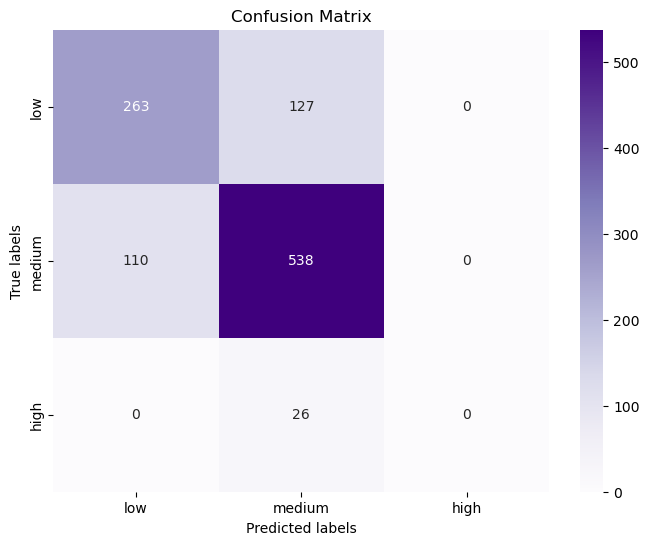

In [88]:
class_names=["low","medium","high"]
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [1]:
print("Hello World1!")

Hello World1!
